In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rk4
%matplotlib inline

In [2]:
# Values given by the exercise
sigma = 10
b = 8/3
r = np.array([0.5, 1.15, 1.3456, 24., 28.])
a0 = np.sqrt(b*(r-1))
C_plus = np.array([a0, a0, r-1])
C_minus = np.array([-a0,-a0,r-1])

/home/leon-alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


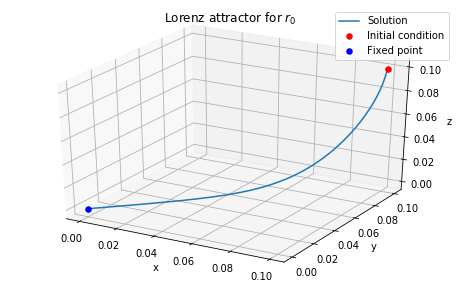

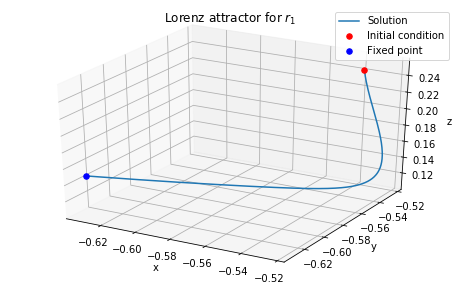

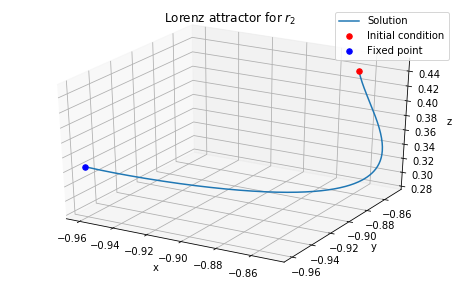

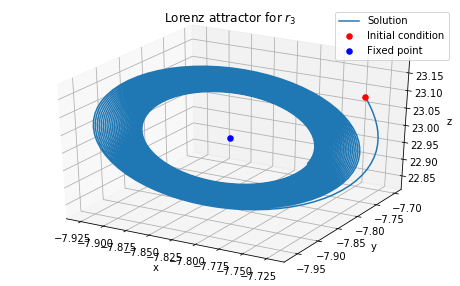

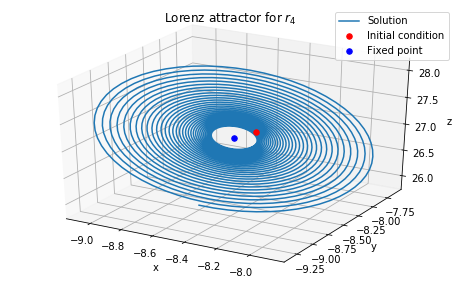

In [3]:
time = 20
h = 0.01
n = int(time/h)

def f(y, x, sigma, b, r):
    y_new = np.zeros(3)
    y_new[0] = -sigma * (y[0] - y[1])
    y_new[1] = r*y[0] - y[1] - y[0]*y[2]
    y_new[2] = y[0]*y[1] - b*y[2]
    return y_new

for i in range(len(r)):
    r_current = r[i]
    y0 = np.zeros(3)
    if r_current < 1:
        y0 = y0 + 0.1
        yn, xn = rk4.rk4(y0=y0, x0=0, f=f, h=h, n=n, f_args={'sigma':sigma, 'b':b, 'r':r_current})
    else:
        y0 = C_minus[:,i] + 0.1
        yn, xn = rk4.rk4(y0=y0, x0=0, f=f, h=h, n=n, f_args={'sigma':sigma, 'b':b, 'r':r_current})
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111, projection='3d')
    plt.title("Lorenz attractor for $r_{0}$".format(i))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.plot(yn[:,0], yn[:,1], yn[:,2], label="Solution")
    ax.scatter(xs=np.array(y0[0]), ys=np.array(y0[1]), zs=np.array(y0[2]), c="r", s=30, label="Initial condition")
    ax.scatter(xs=np.array(y0[0])-0.1, ys=np.array(y0[1])-0.1, zs=np.array(y0[2])-0.1, c="b", s=30, label="Fixed point")
    ax.legend()
    plt.show()